In [69]:
import pandas as pd #data processing library
import matplotlib.pyplot as plt # data visualization liberary
import seaborn as sns # statistical data visualization library
import os #operating system library


for _dirname, _subdirs, _files in os.walk('./'):
    for _filename in _files:
        print(os.path.join(_dirname, _filename))


./covide_19.ipynb
./covid_19_data.csv
./.vscode\settings.json
./.vscode\excel-pq-symbols\excel-pq-symbols.json


In [70]:
df=pd.read_csv('./covid_19_data.csv') #reading the csv file
df.shape #checking the shape of the dataframe

(321, 6)

In [71]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [72]:
df.head(20)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [74]:
df.describe()# getting the statistical summary of the dataframe

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [75]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

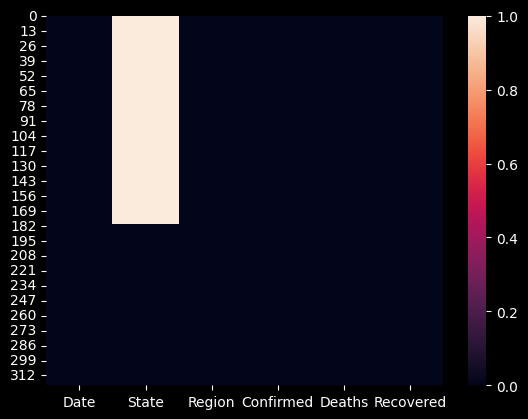

In [76]:
sns.heatmap(df.isnull())# visualizing the null values in the dataframe
plt.show()

In [77]:
df['State'].fillna('national', inplace=True)
df.isnull().sum()

C:\Users\Mounir\AppData\Local\Temp\ipykernel_23772\945206744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna('national', inplace=True)


Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

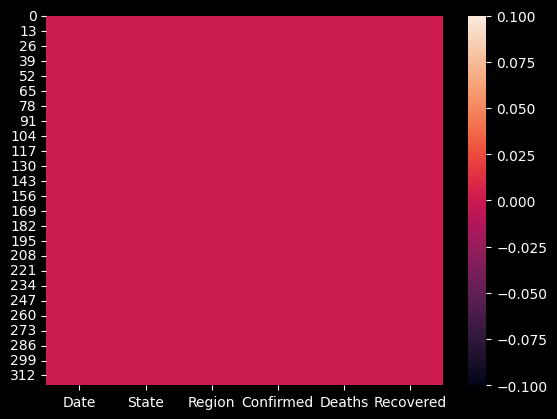

In [78]:
sns.heatmap(df.isnull())# visualizing the null values in the dataframe after filling nulls in state column
plt.show()

In [79]:
df['Date']=pd.to_datetime(df['Date']) # converting the 'Date' column to datetime format

In [80]:
summary=df.groupby('Region')[['Confirmed','Deaths','Recovered']].sum().reset_index()#  getting the summary of the covid cases by region
print(summary)
Top10Confirmed=summary.sort_values(by='Confirmed', ascending=False).head(10) # getting the top 10 rows with highest confirmed cases
print(Top10Confirmed)

                 Region  Confirmed  Deaths  Recovered
0           Afghanistan       1939      60        252
1               Albania        766      30        455
2               Algeria       3848     444       1702
3               Andorra        743      42        423
4                Angola         27       2          7
..                  ...        ...     ...        ...
182  West Bank and Gaza        344       2         71
183      Western Sahara          6       0          5
184               Yemen          6       0          1
185              Zambia         97       3         54
186            Zimbabwe         32       4          5

[187 rows x 4 columns]
             Region  Confirmed  Deaths  Recovered
174              US    1039909   60967     120720
158           Spain     236899   24275     132929
83            Italy     203591   27682      71252
59           France     166543   24121      49118
173              UK     166441   26166        857
63          Germany     1615

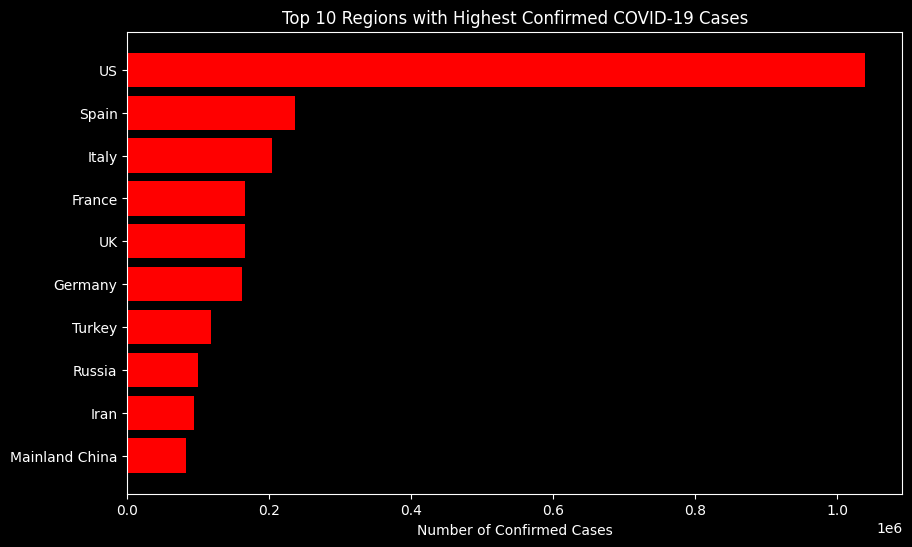

In [81]:
Top10Confirmed.sort_values(by='Confirmed', ascending=True, inplace=True) # sorting the top 10 regions in ascending order for better visualization
plt.figure(figsize=(10,6))
plt.barh(Top10Confirmed['Region'],Top10Confirmed['Confirmed'], color='red')# visualizing a horizontal bar chart for top 10 regions with highest confirmed cases
plt.xlabel('Number of Confirmed Cases')

plt.title('Top 10 Regions with Highest Confirmed COVID-19 Cases')
plt.show()

    Deaths       Region  Confirmed  Recovered
97   60967           US    1039909     120720
96   27682        Italy     203591      71252
95   26166           UK     166441        857
94   24275        Spain     236899     132929
93   24121       France     166543      49118
92    7501      Belgium      47859      11283
91    6467      Germany     161539     120400
90    5957         Iran      93657      73791
89    5513       Brazil      79685      34132
88    4727  Netherlands      38998        119


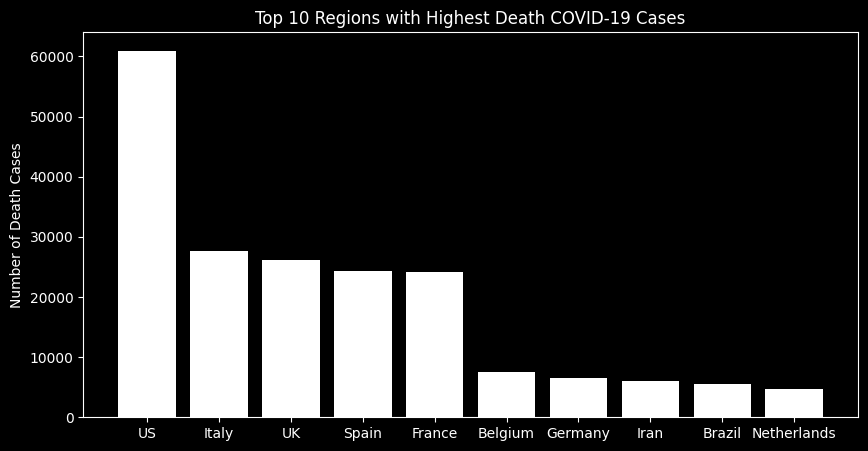

In [84]:
Top10Death=summary.groupby('Deaths').sum().reset_index().sort_values(by='Deaths', ascending=False).head(10) # getting the top 10 rows with highest death cases
print(Top10Death)
plt.figure(figsize=(10,5))
plt.bar(Top10Death['Region'], Top10Death['Deaths'], color='white')# visualizing a horizontal bar chart for top 10 regions with highest death cases
plt.ylabel('Number of Death Cases')
plt.title('Top 10 Regions with Highest Death COVID-19 Cases')
plt.show()

     Recovered          Region  Confirmed  Deaths
153     132929           Spain     236899   24275
152     120720              US    1039909   60967
151     120400         Germany     161539    6467
150      77610  Mainland China      82862    4633
149      73791            Iran      93657    5957
148      71252           Italy     203591   27682
147      49118          France     166543   24121
146      44040          Turkey     117589    3081
145      34132          Brazil      79685    5513
144      22600     Switzerland      29407    1716


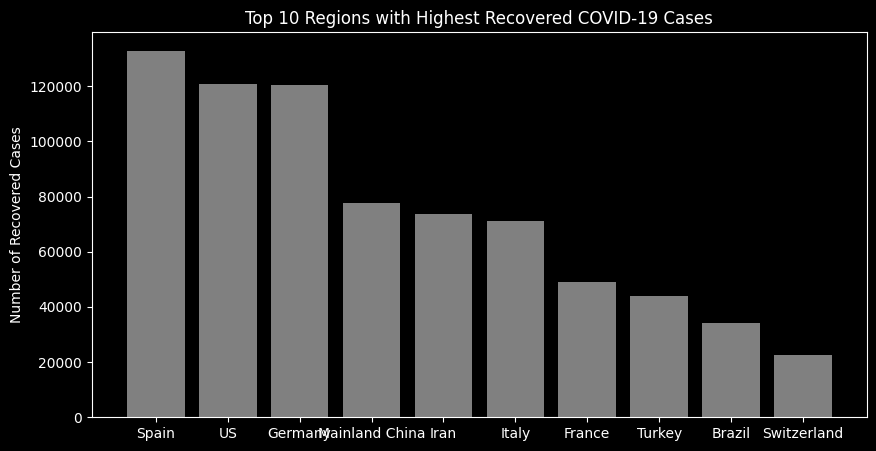

In [83]:
Top10Recovered=summary.groupby('Recovered').sum().reset_index().sort_values(by='Recovered', ascending=False).head(10) # getting the top 10 rows with highest recovered cases
print(Top10Recovered)
plt.figure(figsize=(10,5))

plt.bar(Top10Recovered['Region'], Top10Recovered['Recovered'], color='gray')# visualizing a horizontal bar chart for top 10 regions with highest recovered cases
plt.ylabel('Number of Recovered Cases') 
plt.title('Top 10 Regions with Highest Recovered COVID-19 Cases')
plt.show()

In [ ]:
summary["DeathRate"] = (summary["Deaths"] / summary["Confirmed"]) * 100 
summary["RecoveryRate"] = (summary["Recovered"] / summary["Confirmed"]) * 100

summary.head()

,Region,Confirmed,Deaths,Recovered,DeathRate,RecoveryRate
0,Afghanistan,1939,60,252,3.094379,12.996390
1,Albania,766,30,455,3.916449,59.399478
2,Algeria,3848,444,1702,11.538462,44.230769
3,Andorra,743,42,423,5.652759,56.931359
4,Angola,27,2,7,7.407407,25.925926


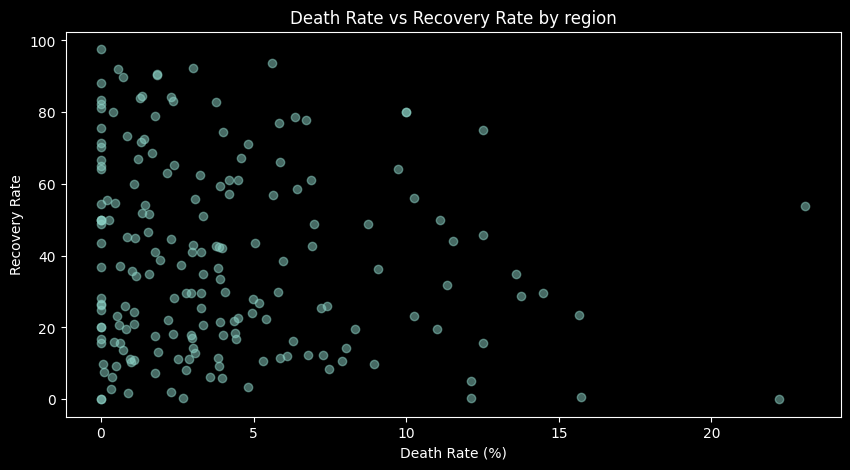

In [90]:
plt.figure(figsize=(10,5))
plt.scatter(summary["DeathRate"], summary["RecoveryRate"], alpha=0.5)
plt.title("Death Rate vs Recovery Rate by region")
plt.xlabel("Death Rate (%)")
plt.ylabel("Recovery Rate")
plt.show()